## Machine Learning Competition Notebook Template

### Student Name : 

**Name Surname ID**  


#### Summary
Please write here the summary of your implementation(s).

## load datasets

In [51]:
dftrain = pd.read_csv("train.csv",index_col='ad_id')
dftest  = pd.read_csv( "test.csv",index_col='ad_id')

In [62]:
# data visualisation

area                                                        Loughshinny
bathrooms                                                             1
beds                                                                  4
ber_classification                                                   E2
county                                                           Dublin
description_block     P. Marry &amp; Associates presents to the mark...
environment                                                        prod
facility                              Parking,Gas Fired Central Heating
features                                                           None
latitude                                                        53.5472
longitude                                                      -6.10292
no_of_units                                                         NaN
price                                                            395000
property_category                                               

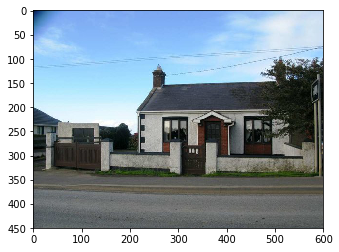

P. Marry &amp; Associates presents to the market this spacious four bedroom semi-detached cottage located on approximately one acre of ground located in the small fishing village of Loughshinny. Boasting many special features including gas fired central heating, large private rear garden to mention but a few, this family home is guaranteed to impress all who view.

Loughshinny is located between Skerries and Rush and benefits from the array of supermarkets, shops ,trendy restaurants, beaches, public transport and the many more facilities that these two towns have to offer.  Serviced by the 33 bus and the M1, Airport and M50 just a short drive away, this location is sure to benefit many potential purchasers.

Viewing is highly recommended. 



Entrance porch:



	Tiled floor
Living room: (18 4 X 13 1)

	Feature fireplace with gas fire, high ceilings, Built-in units, Wall lights, Laminate wood floor, access to dining room, patio doors to rear garden.
Dining room: (12 4 X 9)


	Raised flo

In [79]:
row=150
entry=dftrain.iloc[row:row+1,:]
print(entry.iloc[0,:])
import matplotlib.image as mpimg
img=mpimg.imread(str(entry.index[0])+'.jpg')
plt.imshow(img) 
plt.show() 
print(entry.iloc[0,:].description_block)
print("=========================================================================")
print(entry.iloc[0,:].facility)

In [77]:
entry.iloc[0,:].description_block

'P. Marry &amp; Associates presents to the market this spacious four bedroom semi-detached cottage located on approximately one acre of ground located in the small fishing village of Loughshinny. Boasting many special features including gas fired central heating, large private rear garden to mention but a few, this family home is guaranteed to impress all who view.\n\r\nLoughshinny is located between Skerries and Rush and benefits from the array of supermarkets, shops ,trendy restaurants, beaches, public transport and the many more facilities that these two towns have to offer.  Serviced by the 33 bus and the M1, Airport and M50 just a short drive away, this location is sure to benefit many potential purchasers.\n\r\nViewing is highly recommended. \n\n\n\r\nEntrance porch:\n\n\n\r\n\tTiled floor\r\nLiving room: (18 4 X 13 1)\n\r\n\tFeature fireplace with gas fire, high ceilings, Built-in units, Wall lights, Laminate wood floor, access to dining room, patio doors to rear garden.\r\nDini

In [71]:
entry.

area                                                        Loughshinny
bathrooms                                                             1
beds                                                                  4
ber_classification                                                   E2
county                                                           Dublin
description_block     P. Marry &amp; Associates presents to the mark...
environment                                                        prod
facility                              Parking,Gas Fired Central Heating
features                                                           None
latitude                                                        53.5472
longitude                                                      -6.10292
no_of_units                                                         NaN
price                                                            395000
property_category                                               

## Data Cleaning, Features selection and preprocessing

In [52]:
#select some features columns just for the baseline model
df_subset_train = dftrain[['bathrooms','beds','surface','price']].dropna(axis=0)
df_subset_test  =  dftest[['bathrooms','beds','surface']]

In [53]:
X = df_subset_train.iloc[:,0:3].values #input columns
y = df_subset_train.iloc[:,3].values   #output column, price
#test set
Xtest = df_subset_test.iloc[:,0:3].values #input columns

In [54]:
#we do not need scaling in linear regression

## train/test your model

In [55]:
reg = LinearRegression().fit(X, y)
y_tr_pred = reg.predict(X)
y_te_pred = reg.predict(Xtest)

## Compute MAPE: Mean absolute percentage error

In [56]:
#compute training error
M = np.hstack([y[:,None],y_tr_pred[:,None]])
M

array([[935000.        , 978149.08835239],
       [485000.        , 973630.08892746],
       [935000.        , 978149.08835239],
       ...,
       [299000.        , 286212.2037426 ],
       [495000.        , 561851.27071472],
       [525000.        , 562106.37799244]])

In [58]:
MAPE_training = np.mean(np.abs(M[:,0]-M[:,1])/M[:,0])*100
print(MAPE_training)

47.70130021988754


## Prepare predictions for Kaggles

In [59]:
Prediction = pd.DataFrame()
Prediction.insert(0, 'Id', dftest.index.values.astype(int))
Prediction.insert(1, 'Predicted', y_te_pred)
Prediction.to_csv("Prediction_baseline.csv", index=False)#you can upload this file
Prediction

,Id,Predicted
0,12373510,7.014232e+05
1,12422623,5.619855e+05
2,12377408,8.377557e+05
3,12420093,8.343219e+05
4,12417338,4.256847e+05
5,12322549,5.618592e+05
6,12394530,2.864073e+05
7,12392544,8.411927e+05
8,12379544,4.223993e+05
9,12402318,5.618544e+05
